# Project 1: Trying to do anything by myself

In [1]:

import pandas as pd
import numpy as np

# Because the file which we will be working on is written in root (a language used by CERN users),
# we need to import a package "uproot" which will allow us transfer data from root to python.

import uproot

In [2]:
# The file which we are using is taken from the CERN website "http://opendata.cern.ch/record/211".
# To understand data we can use the tutorial provided at this website.

data = uproot.open("qcd.root")

data.keys()

['events;1']

In [3]:
tree = data["events"]
#tree.keys()

In [4]:
photons = tree.arrays(["Photon_Px","Photon_Py"])
#photons

In [5]:
eventWeight = tree.arrays(["EventWeight"])
#eventWeight

In [101]:
jets = tree.arrays(["NJet","Jet_Px","Jet_Py","Jet_Pz","Jet_E"])
N = jets["NJet"][0]
Px = jets["Jet_Px"][0]
Py = jets["Jet_Py"][0]
Pz = jets["Jet_Pz"][0]
E = jets["Jet_E"][0]

#Px = Px.tolist()
#Px = np.round(Px, 2)

singleEvent = {"Jet_Px": Px, "Jet_Py": Py, "Jet_Pz": Pz, "Jet_E": E}

def foo(**x): 
    for key, val in x.items():
        s = []
        val = val.tolist()
        val = np.round(val,2)
        s.append(val)
        x[key] = s
    return x


#singleEventFrame = pd.DataFrame(singleEvent)
#singleEventFrame

pd.DataFrame(foo(**singleEvent))
#foo(singleEvent)

,Jet_Px,Jet_Py,Jet_Pz,Jet_E
0,"[-207.25, 129.87, 48.95, 28.59]","[92.15, -28.94, -18.83, -33.63]","[18.91, -182.83, 275.48, 9.37]","[229.07, 226.99, 280.72, 46.77]"


In [103]:
xMom = jets["Jet_Px"]
yMom = jets["Jet_Py"]
zMom = jets["Jet_Pz"]
energy = jets["Jet_E"]
nEvents = jets["NJet"]

#xMom = map(prettyfloat, xMom)

fourMomentum = {"JetPx" : xMom, "JetPy" : yMom, "JetPz" : zMom, "JetE" : energy}

xCol = []
for i in xMom:
    if len(i) > 0:
        vals = {}
        i = i.tolist()
        i = np.round(i,2)
        vals["Px"] = i
        xCol.append(vals)

xCol

[{'Px': array([-207.25,  129.87,   48.95,   28.59])},
 {'Px': array([-138.04,  126.42,   30.45,  -19.39])},
 {'Px': array([1.48])},
 {'Px': array([ 53.27, -46.61])},
 {'Px': array([ 531.53, -503.55])},
 {'Px': array([-153.81,  124.61,  -51.06,   38.55,   30.39])},
 {'Px': array([-39.63,  14.55,  29.88])},
 {'Px': array([-255.64,  316.1 ,  -87.65,   18.07,   22.86,   28.52])},
 {'Px': array([31.56, -8.04])},
 {'Px': array([-136.26,   67.59,   72.91,  -39.32,   34.46])},
 {'Px': array([ 64.05, -92.53,  57.48])},
 {'Px': array([ 17.25, -16.18])},
 {'Px': array([-30.08,  41.96])},
 {'Px': array([-177.08,  129.12,   65.36,  -30.99])},
 {'Px': array([ 88.62, -30.28, -28.71])},
 {'Px': array([-133.26,   83.25,   21.75,   41.93,  -31.26])},
 {'Px': array([-10.62,  13.39])},
 {'Px': array([-48.47, -31.96, -30.09])},
 {'Px': array([-59.54,  -0.56, -23.01])},
 {'Px': array([-75.18,  67.88])},
 {'Px': array([-69.53,  39.58])},
 {'Px': array([12.92, -9.  , 13.29])},
 {'Px': array([ 66.62, -50.41,  

In [179]:
pd.set_option("display.max_rows", None)

def jetsAllEvents(**x):
    result = pd.DataFrame()
    for key in x.keys():
        col = []
        name = str(key)
        for value in x[key]:
            value = value.tolist()
            value = np.round(value,2)
            col.append(value)
        result[name] = col
    return result

jetsAllFourMomenta = jetsAllEvents(**fourMomentum)

jetsAllFourMomenta.insert(loc = 0, column = "NJet", value = nEvents)

# deleting empty events:
jetsAllFourMomenta.drop(axis = "rows", labels = [28,51,61,95,97], inplace = True)
jetsAllFourMomenta.reset_index(inplace = True)
del jetsAllFourMomenta["index"]
jetsAllFourMomenta


,NJet,JetPx,JetPy,JetPz,JetE
0,4,"[-207.25, 129.87, 48.95, 28.59]","[92.15, -28.94, -18.83, -33.63]","[18.91, -182.83, 275.48, 9.37]","[229.07, 226.99, 280.72, 46.77]"
1,4,"[-138.04, 126.42, 30.45, -19.39]","[-40.1, 32.83, 31.06, -23.21]","[9.22, 48.83, -74.05, 37.53]","[145.06, 139.59, 86.09, 48.55]"
2,1,[1.48],[35.45],[159.65],[163.68]
3,2,"[53.27, -46.61]","[-34.74, 18.75]","[-364.0, 49.85]","[369.77, 71.07]"
4,2,"[531.53, -503.55]","[1652.4, -1532.58]","[-1289.7, 799.83]","[2163.85, 1802.55]"
5,5,"[-153.81, 124.61, -51.06, 38.55, 30.39]","[-118.21, 133.53, -27.41, 11.7, -22.46]","[203.64, 346.43, 158.82, 36.98, 3.99]","[282.03, 393.08, 169.33, 55.11, 39.28]"
6,3,"[-39.63, 14.55, 29.88]","[20.91, -41.64, 6.45]","[59.99, 137.36, 6.66]","[75.61, 144.4, 31.79]"
7,6,"[-255.64, 316.1, -87.65, 18.07, 22.86, 28.52]","[-268.38, 183.05, 72.53, 32.31, -26.13, 10.94]","[684.62, -122.88, 169.55, -22.08, -36.33, -42.7]","[779.29, 388.39, 204.37, 43.81, 50.6, 53.12]"
8,2,"[31.56, -8.04]","[232.08, -225.49]","[91.72, 386.82]","[252.62, 448.6]"
9,5,"[-136.26, 67.59, 72.91, -39.32, 34.46]","[-58.81, 43.45, -31.76, 58.93, 5.71]","[-673.32, 106.7, -167.18, -16.24, -24.79]","[690.03, 135.04, 185.91, 73.47, 43.53]"


In [192]:
energyAvg = jetsAllFourMomenta[["NJet", "JetE"]].copy()
energyAvg




,NJet,JetE
0,4,"[229.07, 226.99, 280.72, 46.77]"
1,4,"[145.06, 139.59, 86.09, 48.55]"
2,1,[163.68]
3,2,"[369.77, 71.07]"
4,2,"[2163.85, 1802.55]"
5,5,"[282.03, 393.08, 169.33, 55.11, 39.28]"
6,3,"[75.61, 144.4, 31.79]"
7,6,"[779.29, 388.39, 204.37, 43.81, 50.6, 53.12]"
8,2,"[252.62, 448.6]"
9,5,"[690.03, 135.04, 185.91, 73.47, 43.53]"


In [213]:
r = energyAvg["JetE"].tolist()
r

g = []
def meanList(*x):
    for i in x:
        k = mean(i)
        k = k.round(2)
        g.append(k)
    return g

h = meanList(*r)
h
    
newSeries = pd.Series(h)
newSeries

energyAvg["AvgE"] = newSeries

neR = energyAvg.sort_values(by = ["NJet"]).dropna()
neR["NJet"].value_counts().sort_index()


1    14
2    59
3    36
4    13
5    11
6     2
7     1
8     1
Name: NJet, dtype: int64

<AxesSubplot: ylabel='Frequency'>

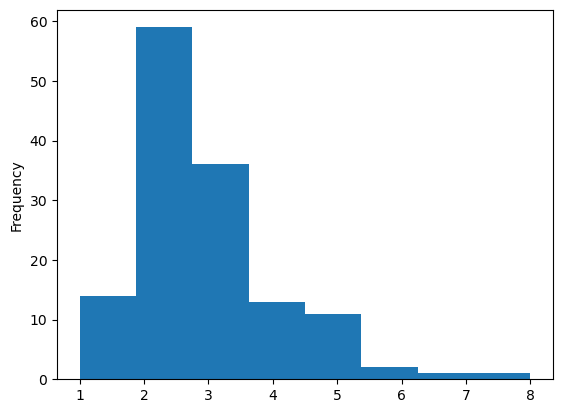

In [214]:
import matplotlib as plt
%matplotlib inline 

energyAvg["NJet"].plot(kind = "hist", bins = 8)

<AxesSubplot: xlabel='NJet', ylabel='AvgE'>

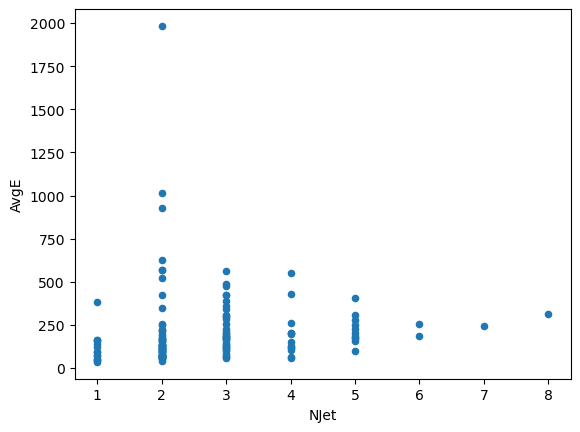

In [215]:
energyAvg.plot(kind = "scatter", x = "NJet", y = "AvgE")

<AxesSubplot: title={'center': 'Average Energy'}, xlabel='NJet', ylabel='AvgE'>

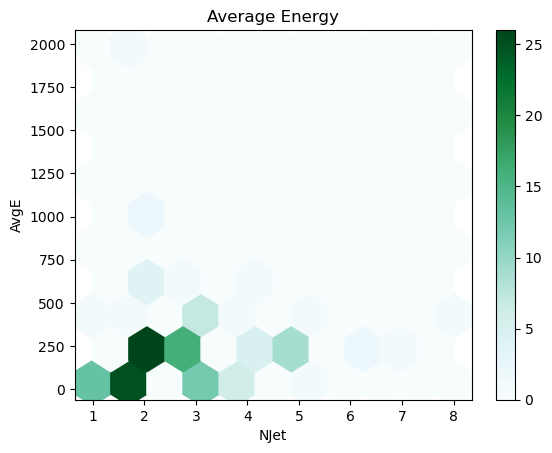

In [216]:
energyAvg.plot.hexbin(x = "NJet", y = "AvgE", gridsize = 10, title = "Average Energy")

In [236]:
import matplotlib.pyplot as plt

energyMaxMin = energyAvg.copy()
valueNJet = energyMaxMin["NJet"]
energyMaxMin = energyMaxMin.where(valueNJet > 1).dropna()
energyMaxMin.reset_index(inplace = True)
del energyMaxMin["index"]
energyMaxMin

enList = energyMaxMin["JetE"].tolist()

enMax = []
enMin = []

def MaxMinList(*x):
    for i in x:
        mx = max(i)
        mn = min(i)
        mx = mx.round(2)
        mn = mn.round(2)
        enMax.append(mx)
        enMin.append(mn)
    return enMax, enMin

p = MaxMinList(*enList)

newFrame = pd.DataFrame(p)
newFrameA = newFrame.transpose()
newFrameA.rename(columns = {0 : "EMax", 1 : "EMin"}, inplace =True)
newFrameA
newFrameA["EDiff"] = newFrameA["EMax"] - newFrameA["EMin"]

AA = energyMaxMin.join(newFrameA)
BB = AA.sort_values(by = ["NJet"])

BB

,NJet,JetE,AvgE,EMax,EMin,EDiff
61,2.0,"[80.48, 115.8]",98.14,115.80,80.48,35.32
78,2.0,"[74.61, 116.8]",95.70,116.80,74.61,42.19
77,2.0,"[91.61, 139.63]",115.62,139.63,91.61,48.02
75,2.0,"[99.65, 86.9]",93.28,99.65,86.90,12.75
74,2.0,"[93.83, 53.42]",73.62,93.83,53.42,40.41
71,2.0,"[661.95, 1192.28]",927.12,1192.28,661.95,530.33
68,2.0,"[80.69, 171.68]",126.18,171.68,80.69,90.99
67,2.0,"[1008.94, 122.78]",565.86,1008.94,122.78,886.16
62,2.0,"[162.43, 161.46]",161.94,162.43,161.46,0.97
60,2.0,"[92.16, 35.4]",63.78,92.16,35.40,56.76


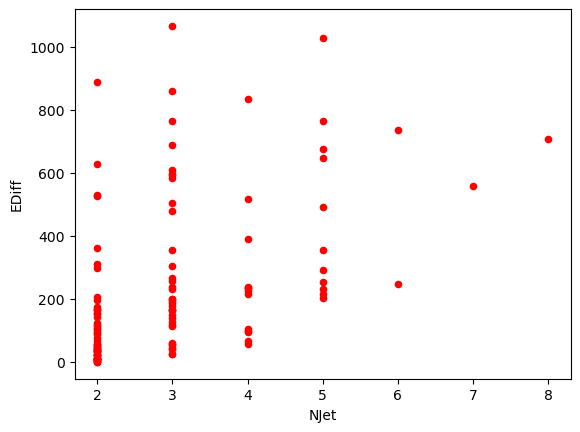

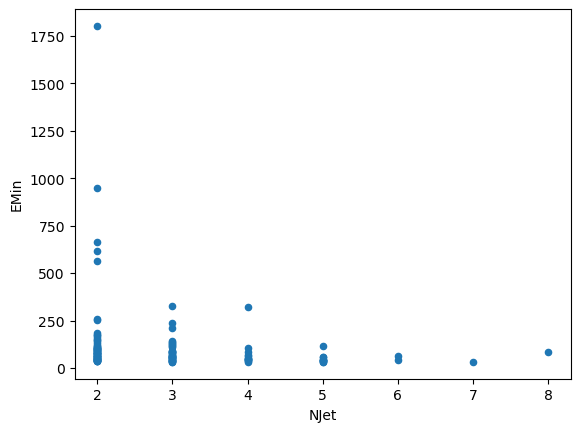

In [239]:
BB.plot(kind = "scatter", x = "NJet", y = "EDiff", color = "red")
BB.plot(kind = "scatter", x = "NJet", y = "EMin")
plt.show()

#plt.scatter(x = "NJet", y = "EMax")
#plt.scatter(x = "NJet", y = "EMin")
#plt.show()

In [194]:
s = jetsAllFourMomenta["JetE"]
hmax = np.argmax(s[0])
g1 = s[0][hmax]
hmin = np.argmin(s[28])
g2 = s[28][hmin]

p = g1 + g2
p
type(s)

pandas.core.series.Series